In [1]:
# TwoDuBEM version: https://github.com/rodpcastro/twodubem/tree/a85a810fafe912cdf0e40f879ff83cbd99ce6c06
import numpy as np
import matplotlib.pyplot as plt
from cylinder import FloatingCylinder
from wavesolver import RadiationSolver

In [2]:
ursell_ws = np.loadtxt('references/ursell_frequencies.csv')
ursell_azn = np.loadtxt('references/ursell_heave_added_mass.csv')
ursell_bzn = np.loadtxt('references/ursell_heave_wave_damping.csv')
ursell_wa = np.loadtxt('references/ursell_wave_rao.csv')

vugts_azn = np.loadtxt('references/vugts_heave_added_mass.csv', delimiter=',')
vugts_bzn = np.loadtxt('references/vugts_heave_wave_damping.csv', delimiter=',')
vugts_wa = np.loadtxt('references/vugts_wave_rao.csv', delimiter=',')

In [3]:
# Parameters
rho = 1.0               # Water density
g = 9.81                # Acceleration of gravity
R = 1.0                 # Cylinder radius
A = 0.5 * np.pi * R**2  # Cylinder submerged volume/length

wv = np.linspace(0.25, 5.0, 50)  # Frequencies
kv = wv**2 / g                   # Wave numbers
lv = 2*np.pi / kv                # Wave lengths
ws = wv * np.sqrt(R / g)         # Dimensionless frequencies

In [4]:
nv = np.empty_like(wv, dtype=np.int32)  # Number of mesh elements
az = np.empty_like(wv)                  # Heave Added mass
bz = np.empty_like(wv)                  # Heave Wave damping
wa = np.empty_like(wv)                  # Wave/Heave RAO

for i, w in enumerate(wv):
    k = w**2 / g
    l = 2*np.pi / k
    
    FC = FloatingCylinder(l, l)

    nv[i] = FC.number_of_elements

    solver = RadiationSolver(FC)

    az[i], bz[i], wa[i] = solver.get_radiation_coefficients_and_wave_amplitude(w)


print(
    f"mininum number of elements = {nv.min()}\n"
    f"maximum number of elements = {nv.max()}\n"
    f"average number of elements = {nv.mean().astype(np.int32)}\n"
)

# Dimensionless radiation coefficients.
azn = az / (rho * A)
bzn = bz * np.sqrt(R/g) / (rho * A)

mininum number of elements = 101
maximum number of elements = 122
average number of elements = 109



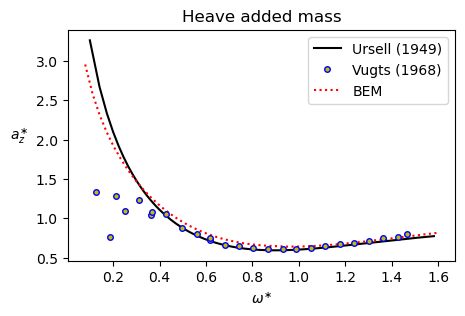

In [5]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_title('Heave added mass')
ax.set_xlabel(r'$\omega^{\ast}$')
ax.set_ylabel(r'$a^{\ast}_z$', rotation=0, labelpad=12)

ax.plot(ursell_ws, ursell_azn, '-k', label='Ursell (1949)')
ax.plot(ws, azn, ':r', label='BEM')
ax.plot(vugts_azn[:, 0], vugts_azn[:, 1], 'o', mfc='y', ms=4, mec='b', mew=1, label='Vugts (1968)')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(
    [labels[0], labels[2], labels[1]],
    [handles[0], handles[2], handles[1]]
))
ax.legend(by_label.values(), by_label.keys())

plt.savefig('heave_added_mass.svg', bbox_inches='tight')
plt.show()

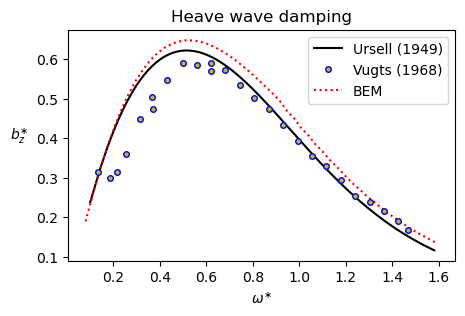

In [6]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_title('Heave wave damping')
ax.set_xlabel(r'$\omega^{\ast}$')
ax.set_ylabel(r'$b^{\ast}_z$', rotation=0, labelpad=12)

ax.plot(ursell_ws, ursell_bzn, '-k', label='Ursell (1949)')
ax.plot(ws, bzn, ':r', label='BEM')
ax.plot(vugts_bzn[:, 0], vugts_bzn[:, 1], 'o', mfc='y', ms=4, mec='b', mew=1, label='Vugts (1968)')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(
    [labels[0], labels[2], labels[1]],
    [handles[0], handles[2], handles[1]]
))
ax.legend(by_label.values(), by_label.keys())

plt.savefig('heave_wave_damping.svg', bbox_inches='tight')
plt.show()

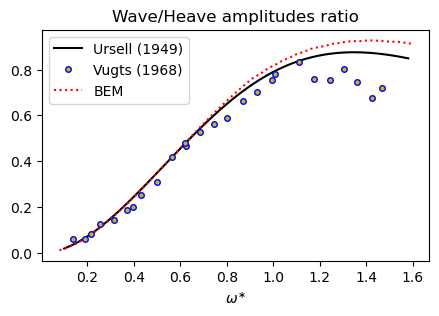

In [7]:
fig, ax = plt.subplots(figsize=(5,3))

ax.set_title('Wave/Heave amplitudes ratio')
ax.set_xlabel(r'$\omega^{\ast}$')

ax.plot(ursell_ws, ursell_wa, '-k', label='Ursell (1949)')
ax.plot(ws, wa, ':r', label='BEM')
ax.plot(vugts_wa[:, 0], vugts_wa[:, 1], 'o', mfc='y', ms=4, mec='b', mew=1, label='Vugts (1968)')

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(
    [labels[0], labels[2], labels[1]],
    [handles[0], handles[2], handles[1]]
))
ax.legend(by_label.values(), by_label.keys())

plt.savefig('wave_rao.svg', bbox_inches='tight')
plt.show()